# Notebook de travail

Ce notebook est généré de façon incrémentale pour accomplir la tâche décrite ci-dessous.

## Objectif du Notebook

Ce notebook a pour objectif de télécharger les titres d'actualités d'un flux RSS public, de les stocker dans un fichier CSV, et de visualiser ces titres sous forme de WordCloud (nuage de mots). Le flux RSS choisi peut être celui de CNN ou tout autre flux d'actualités publique facilement accessible.

### Tâche originale

Créer un notebook Python qui télécharge un flux RSS public (p.ex. CNN), stocke les titres dans un fichier CSV, puis génère un nuage de mots (WordCloud).


### Interprétation et sous-objectifs

Pour atteindre cet objectif, nous suivrons les étapes suivantes :
1. **Téléchargement du Flux RSS** : Accéder et extraire les titres du flux RSS choisi.
2. **Stockage des Titres** : Enregistrer les titres extraits dans un fichier CSV pour une utilisation facile et flexible.
3. **Génération du Nuage de Mots** : Utiliser les données extraites pour créer un WordCloud, ce qui aidera à visualiser les mots les plus fréquemment apparus dans les titres.

## 0. Installation des dépendances

Vérifiez l'environnement et utilisez `%pip install --quiet` dans la cellule de code suivante pour installer les packages nécessaires: \ `feedparser` pour l'analyse RSS, `pandas` pour travailler avec les données CSV, et `wordcloud` pour générer le nuage de mots.

In [1]:
%pip install --quiet feedparser pandas wordcloud

Note: you may need to restart the kernel to use updated packages.


  DEPRECATION: Building 'sgmllib3k' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'sgmllib3k'. Discussion can be found at https://github.com/pypa/pip/issues/6334
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


## 1. Préparation de l'environnement

Nous allons importer les bibliothèques nécessaires pour gérer le flux RSS, manipuler les données et créer un nuage de mots. Les principales bibliothèques incluent `feedparser`, `pandas`, et `wordcloud`.

Également, nous configurerons la journalisation pour aider au débogage et suivi des opérations exécutées dans ce notebook.

In [2]:
import feedparser
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Configuration de la journalisation
import logging
logging.basicConfig(level=logging.INFO)

## 2. Initialisation

Dans cette partie, nous allons initialiser notre programme en configurant les paramètres de base tels que l'URL du flux RSS, et le chemin du fichier CSV où les titres seront stockés. Nous allons ensuite extraire les données nécessaires du flux RSS.

In [3]:
# Définir l'URL du flux RSS
rss_url = 'http://rss.cnn.com/rss/edition.rss'

# Définir le chemin du fichier CSV
csv_file_path = 'rss_titles.csv'

# Extraire les données du flux RSS
feed = feedparser.parse(rss_url)

# Vérifier les données extraites
if feed.bozo:
    logging.error('Failed to parse RSS feed.')
else:
    logging.info('Successfully parsed RSS feed.')

INFO:root:Successfully parsed RSS feed.


## 3. Traitement

Cette section implique le traitement des données extraites. Cela comprend l'analyse du flux RSS, l'interprétation des données, l'extraction des titres, et leur stockage dans un fichier CSV. Le fichier CSV servira ensuite de source pour la création du nuage de mots.

In [4]:
# Extraire les titres et les stocker dans le fichier CSV
if 'entries' in feed:
    titles = [{'title': entry.title} for entry in feed.entries]
    df = pd.DataFrame(titles)
    df.to_csv(csv_file_path, index=False)
    logging.info(f'Titles saved to {csv_file_path}')
else:
    logging.error('No entries found in RSS feed.')

INFO:root:Titles saved to rss_titles.csv


## 4. Analyse

Ici, nous allons charger le fichier CSV contenant les titres des actualités et l'utiliser pour générer un nuage de mots. Le nuage de mots nous permettra de visualiser la fréquence des termes apparus dans les titres, en mettant en avant les mots les plus courants.

Cela inclura des étapes comme le nettoyage des données textuelles, la configuration de l'objet WordCloud, et enfin l'affichage du nuage de mots.

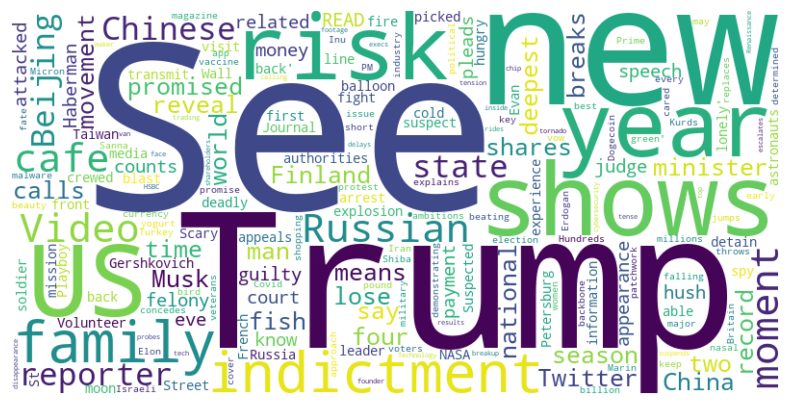

INFO:root:WordCloud generated successfully.


In [5]:
# Charger les titres depuis le fichier CSV
try:
    df = pd.read_csv(csv_file_path)
    text = ' '.join(title for title in df['title'])
    
    # Générer le nuage de mots
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    # Afficher le nuage de mots
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()
    logging.info('WordCloud generated successfully.')
except FileNotFoundError:
    logging.error(f'File {csv_file_path} not found.')
except Exception as e:
    logging.error(f'An error occurred: {e}')

## 5. Conclusion

Dans cette section, nous récapitulerons les étapes suivies et les résultats obtenus. Nous tirerons des conclusions sur le processus de création du fichier CSV et du nuage de mots.

Nous réfléchirons également à des options d'amélioration, comme ajuster l'analyse des données pour d'autres types de flux RSS, ou améliorer l'esthétique et la lisibilité du nuage de mots.

In [6]:
# Cellule 5